# Clustering

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

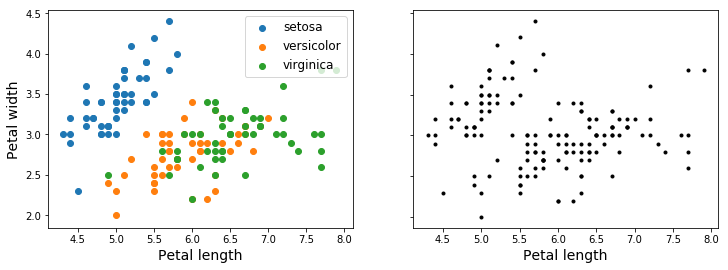

In [4]:
plt.figure(figsize=(12, 4))

ax = plt.subplot(121)

for i, sp in enumerate(data.target_names):
    ax.scatter(X[y==i, 0], X[y==i, 1], label=sp)
    
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

In [5]:
from sklearn.mixture import GaussianMixture

In [6]:
gm = GaussianMixture(n_components=3, random_state=42)
y_pred = gm.fit(X).predict(X)
mapping = np.array([2, 0, 1])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

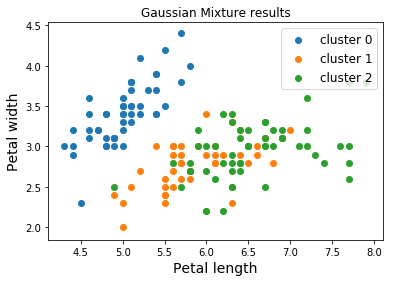

In [7]:
ax = plt.subplot(111)

for i in np.unique(y_pred):
    ax.scatter(X[y_pred==i, 0], X[y_pred==i, 1], label=f'cluster {i}')

plt.title('Gaussian Mixture results')
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()

Comparing the cluster results to the original labels.

In [8]:
np.sum(y_pred==y)

145

In [9]:
np.sum(y_pred==y) / len(y_pred)

0.9666666666666667

## K-means

In [10]:
from sklearn.cluster import KMeans

In [11]:
km = KMeans(n_clusters=3)

In [12]:
y_pred = km.fit_predict(X)

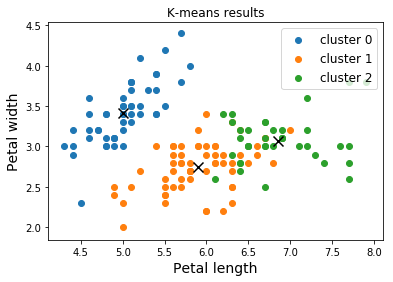

In [13]:
ax = plt.subplot(111)

for i in np.unique(y_pred):
    ax.scatter(X[y_pred==i, 0], X[y_pred==i, 1], label=f'cluster {i}')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=100,marker='x', c='k', linewidths=3)

plt.title('K-means results')
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper right", fontsize=12)

plt.show()

In [14]:
np.sum(y_pred==y) / len(y_pred)

0.8933333333333333

In [15]:
km.cluster_centers_[:,:2]

array([[5.006     , 3.418     ],
       [5.9016129 , 2.7483871 ],
       [6.85      , 3.07368421]])

In [16]:
import umap

In [17]:
um = umap.UMAP(n_neighbors=18, random_state=42)

In [18]:
trans_x = um.fit_transform(X)

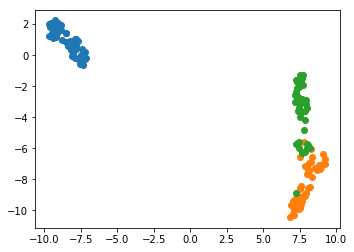

In [19]:
plt.figure(figsize=(12, 4))

ax = plt.subplot(121)

for i, sp in enumerate(data.target_names):
    ax.scatter(trans_x[y==i, 0], trans_x[y==i, 1])


In [20]:
from sklearn.datasets import make_blobs